In [1]:
import scapy.all as sc
import numpy as np
import pandas as pd
from scipy.stats import entropy

In [2]:
SNIFF_TIMEOUT = 1200
BROADCAST = "BROADCAST"
UNICAST = "UNICAST"
PCAP_FILE = "labos-facu-tarde-(30mins).pcap"
ARP_OP_WHO_HAS = 1
ARP_OP_IS_AT = 2

## Leo los paquetes del archivo .pcap

In [3]:
packages = sc.sniff(offline=PCAP_FILE)

## Ejercicio 3.2.1

In [4]:
def simbolo_s(package):
    if p.dst == 'ff:ff:ff:ff:ff:ff':
        return BROADCAST
    else:
        return UNICAST

In [5]:
def entropia_fuente(fuente):
    counts = fuente.value_counts()
    return entropy(base=2,pk=counts.as_matrix())

In [6]:
def informacion_simbolos(fuente):
    counts = fuente.value_counts()
    total = counts.sum()
    probs = counts / float(total)
    return pd.Series(- np.log2(probs), index=counts.index)

In [10]:
fuente = pd.Series([simbolo_s(p) for p in packages])
contadores = fuente.value_counts()
print "Entropia fuente S =", entropia_fuente(fuente)
print contadores
print informacion_simbolos(fuente)

Entropia fuente S = 0.431375330298
UNICAST      75967
BROADCAST     7374
dtype: int64
UNICAST      0.133654
BROADCAST    3.498507
dtype: float64


¿La entropía de la fuente S es máxima? 

La entropia no es maxima,

¿Que sugiere esto acerca de la red? 

...

¿Está relacionado con el overhead impuesto por la red debido a los protocolos de control (i.e.: ARP)?

Si, esta relacionado con el overhead impuesto por la red debido a los protocolos de control, ya que estos van a ser un subconjunto de los paquetes UNICAST y BROADCAST.

## Ejercicio 3.2.2

In [13]:
arp_packages = sc.sniff(offline=PCAP_FILE, lfilter=lambda x: x.haslayer(sc.ARP))

In [14]:
arp_packages = map(lambda p: p["ARP"], arp_packages)
who_has_packages = filter(lambda p : p.op == ARP_OP_WHO_HAS,arp_packages)
is_at_packages = filter(lambda p : p.op == ARP_OP_IS_AT, arp_packages)

In [37]:
def cantidad_mensajes_con_destino(paquetes, fuente, destino):
    cantidad_mensajes = 0
    for paquete in paquetes:
        if (paquete.pdst==destino):
            cantidad_mensajes = cantidad_mensajes + 1
    return cantidad_mensajes

cm = cantidad_mensajes_con_destino(who_has_packages, "10.2.7.254", "255.255.255.255")
print "Cantidad de mensajes boradcast: ", cm

Cantidad de mensajes boradcast:  0


In [16]:
fuente_s2 = pd.Series([p.pdst for p in who_has_packages])
contadores = fuente_s2.value_counts()
#informacion_de_los_simbolos = 
print contadores
print "Entropia de la fuente =", entropia_fuente(fuente_s2)
print "Informacion simbolos"
print informacion_simbolos(fuente_s2).iloc[:]

print "contidad de nodos: ", informacion_simbolos(fuente_s2).size

10.2.7.254         1059
10.2.203.254        706
10.2.1.250          231
10.2.3.254          155
10.2.2.254          102
169.254.255.255      97
10.2.0.67            85
10.2.0.65            84
10.2.0.64            84
10.2.0.187           60
10.2.7.249           49
10.2.7.250           46
10.2.203.182         22
10.210.210.199       21
10.2.2.250           20
10.2.0.190           20
10.2.201.82          19
10.2.1.4             17
10.2.203.155         16
10.2.200.230         13
10.2.3.249           13
10.2.201.192         13
10.2.202.191         12
10.2.202.31          12
10.2.0.254           11
10.2.2.9             11
10.2.203.72          10
10.2.200.6           10
10.2.6.15            10
10.2.5.1             10
                   ... 
10.2.201.73           1
10.2.0.185            1
10.2.201.117          1
10.2.5.12             1
10.2.200.207          1
10.2.0.251            1
10.2.200.144          1
10.2.203.135          1
10.2.202.61           1
10.2.4.11             1
10.2.202.205    

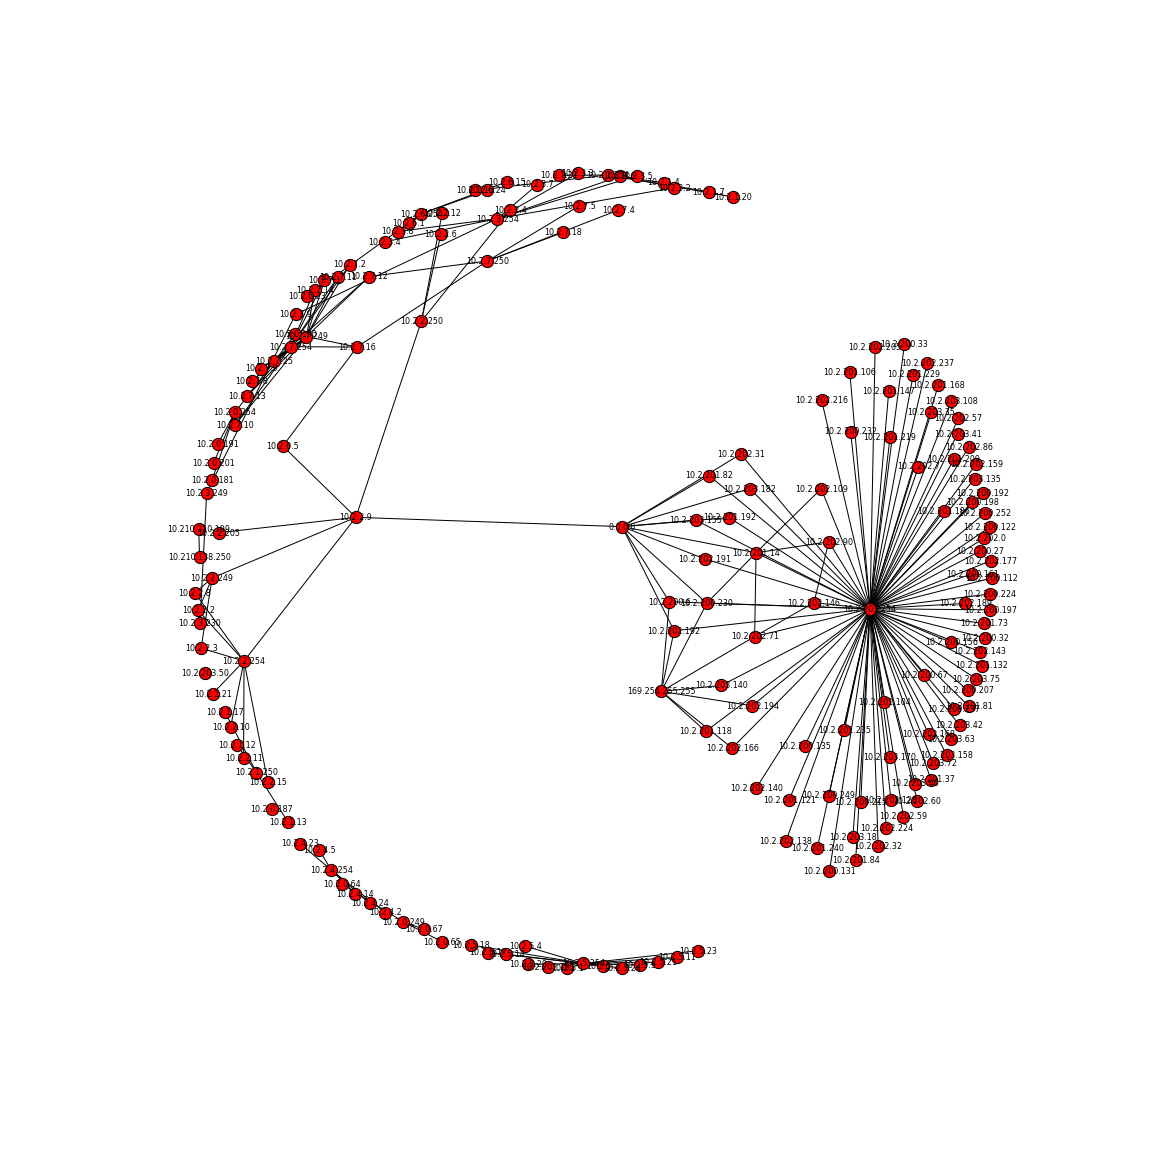

Cantidad de Nodos:  180
Cantidad de Enlaces:  218


In [34]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab


etiquetas={}
def crear_grafo(fuente, etiquetas, contadores):
    W = nx.Graph()
    #W.size(True)
    for paquete in fuente:
        agregar_paquete(W, paquete, etiquetas, contadores)
    return W

def agregar_paquete(grafo, paquete, etiquetas, contadores):
    origen = paquete.psrc
    destino = paquete.pdst
    if (contadores[destino]>5):
        if (not grafo.has_node(origen)):
            grafo.add_node(origen)
            etiquetas[origen]=origen
        if (not grafo.has_node(destino)):
            grafo.add_node(destino)
            etiquetas[destino]=destino

        grafo.add_edge(origen, destino)
    return grafo

        

def setear_esquema(grafo, ancho, alto, tamano_nodo, tamano_fuente):
    plt.figure(3, figsize=(ancho, alto)) 
    pos=nx.spring_layout(grafo)
    nx.draw_networkx_labels(grafo, pos, etiquetas, node_size=tamano_nodo, font_size=tamano_fuente)
    nx.draw(grafo, pos, node_size=tamano_nodo, font_size=tamano_fuente)

G = crear_grafo(who_has_packages, etiquetas, contadores)        

setear_esquema(G, 20, 20, 150, 8)

pylab.show()

print "Cantidad de Nodos: ", A.number_of_nodes()
print "Cantidad de Enlaces: ", A.number_of_edges()


#print "Nodos: ", A.number_of_nodes(), A.nodes()
#print "Enlaces: ", A.number_of_edges(),A.edges()
#print contadores

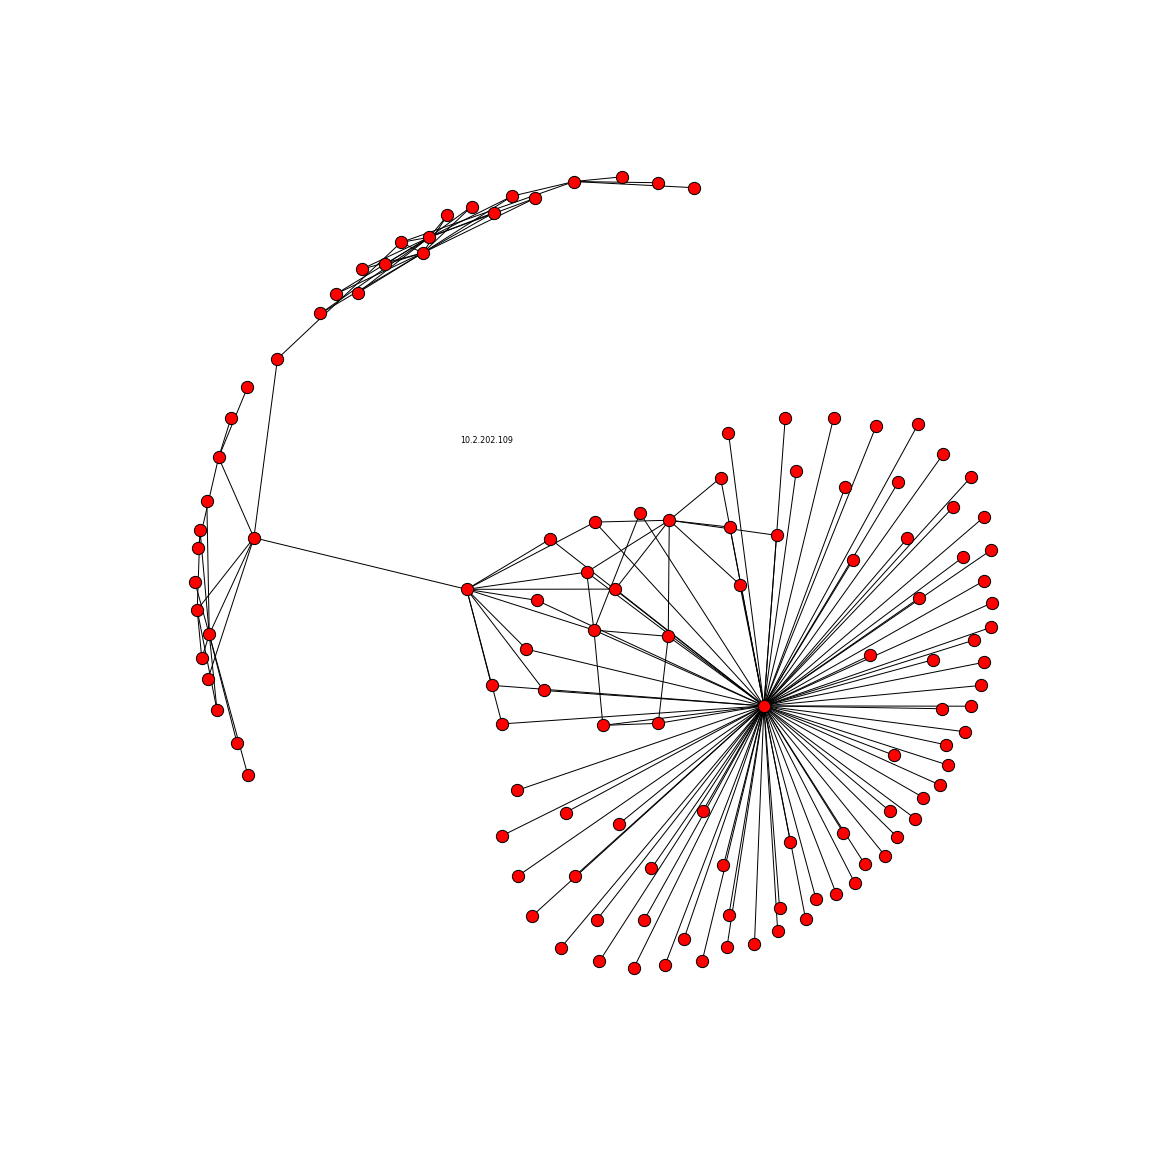

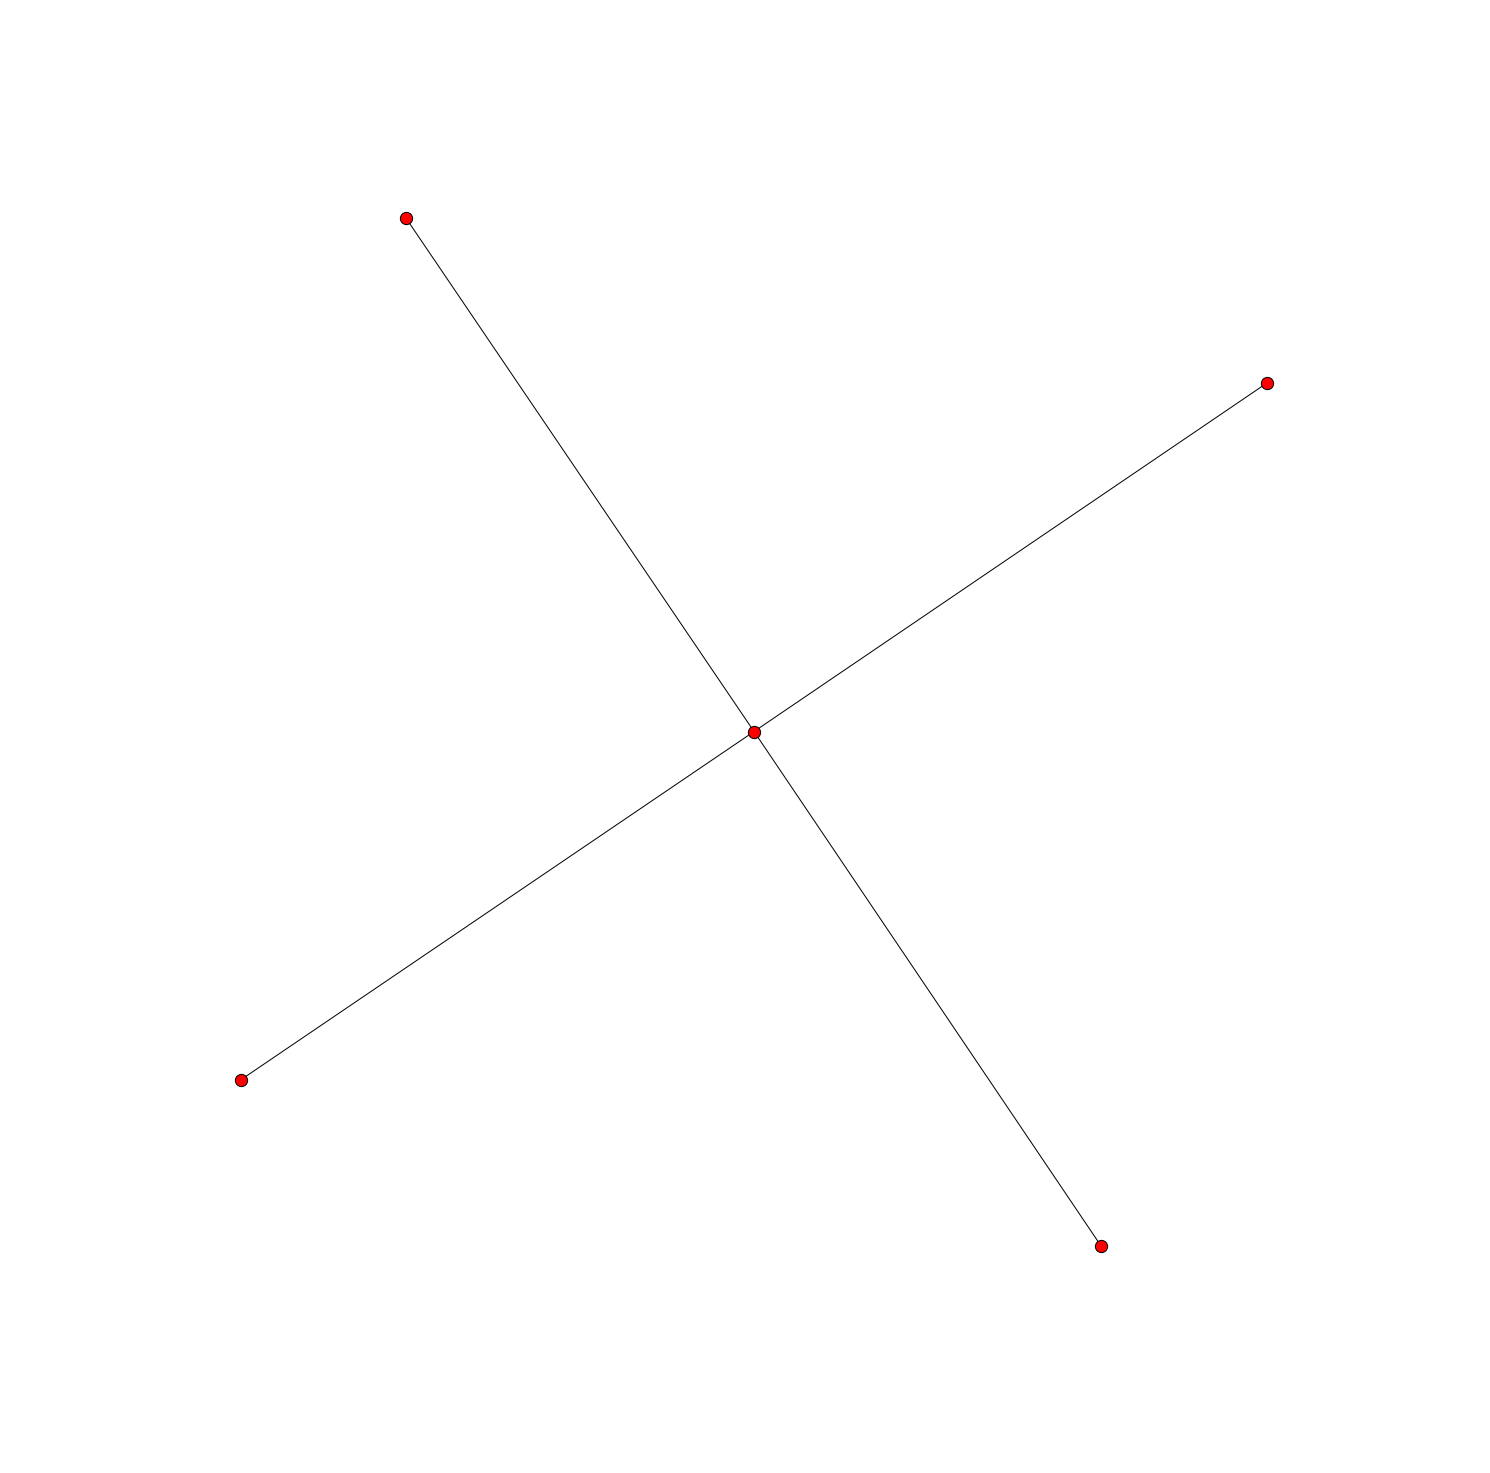

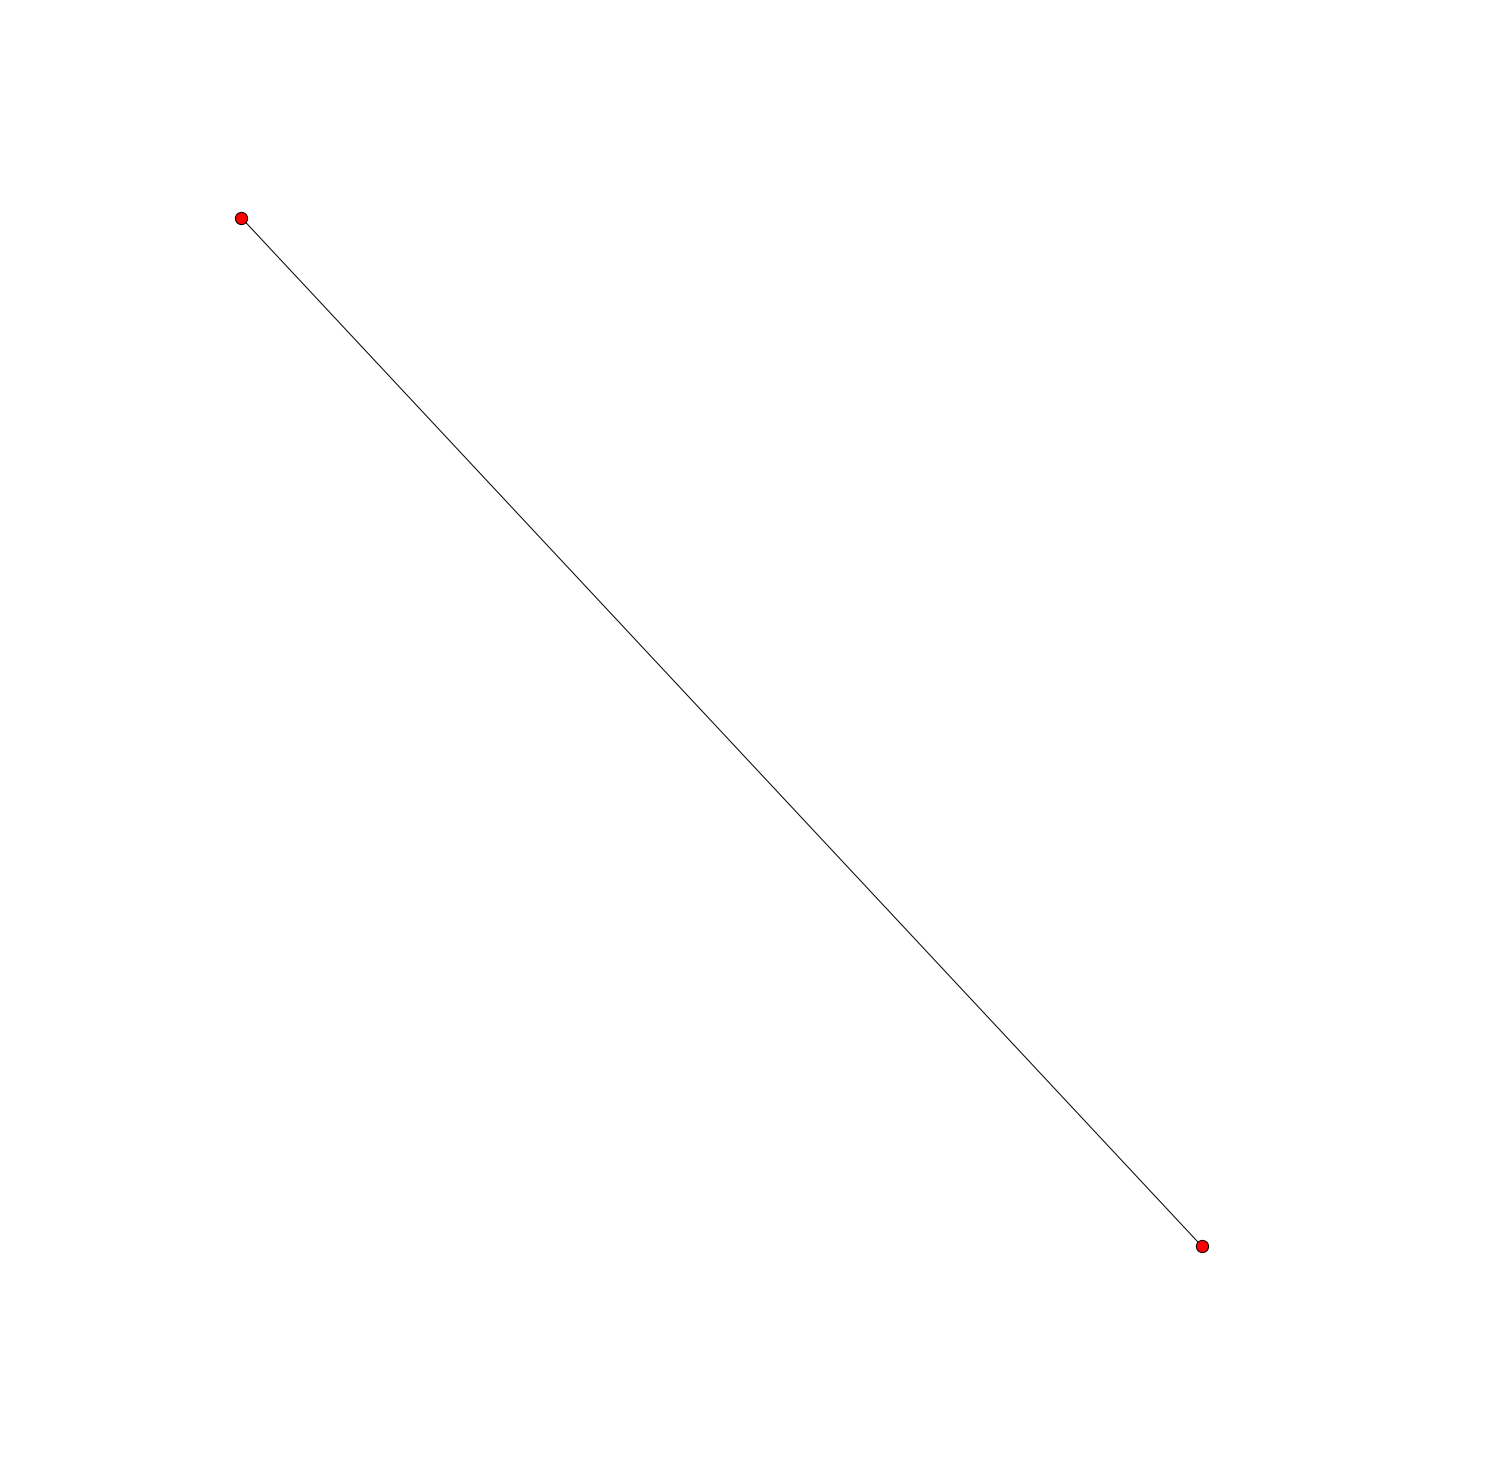

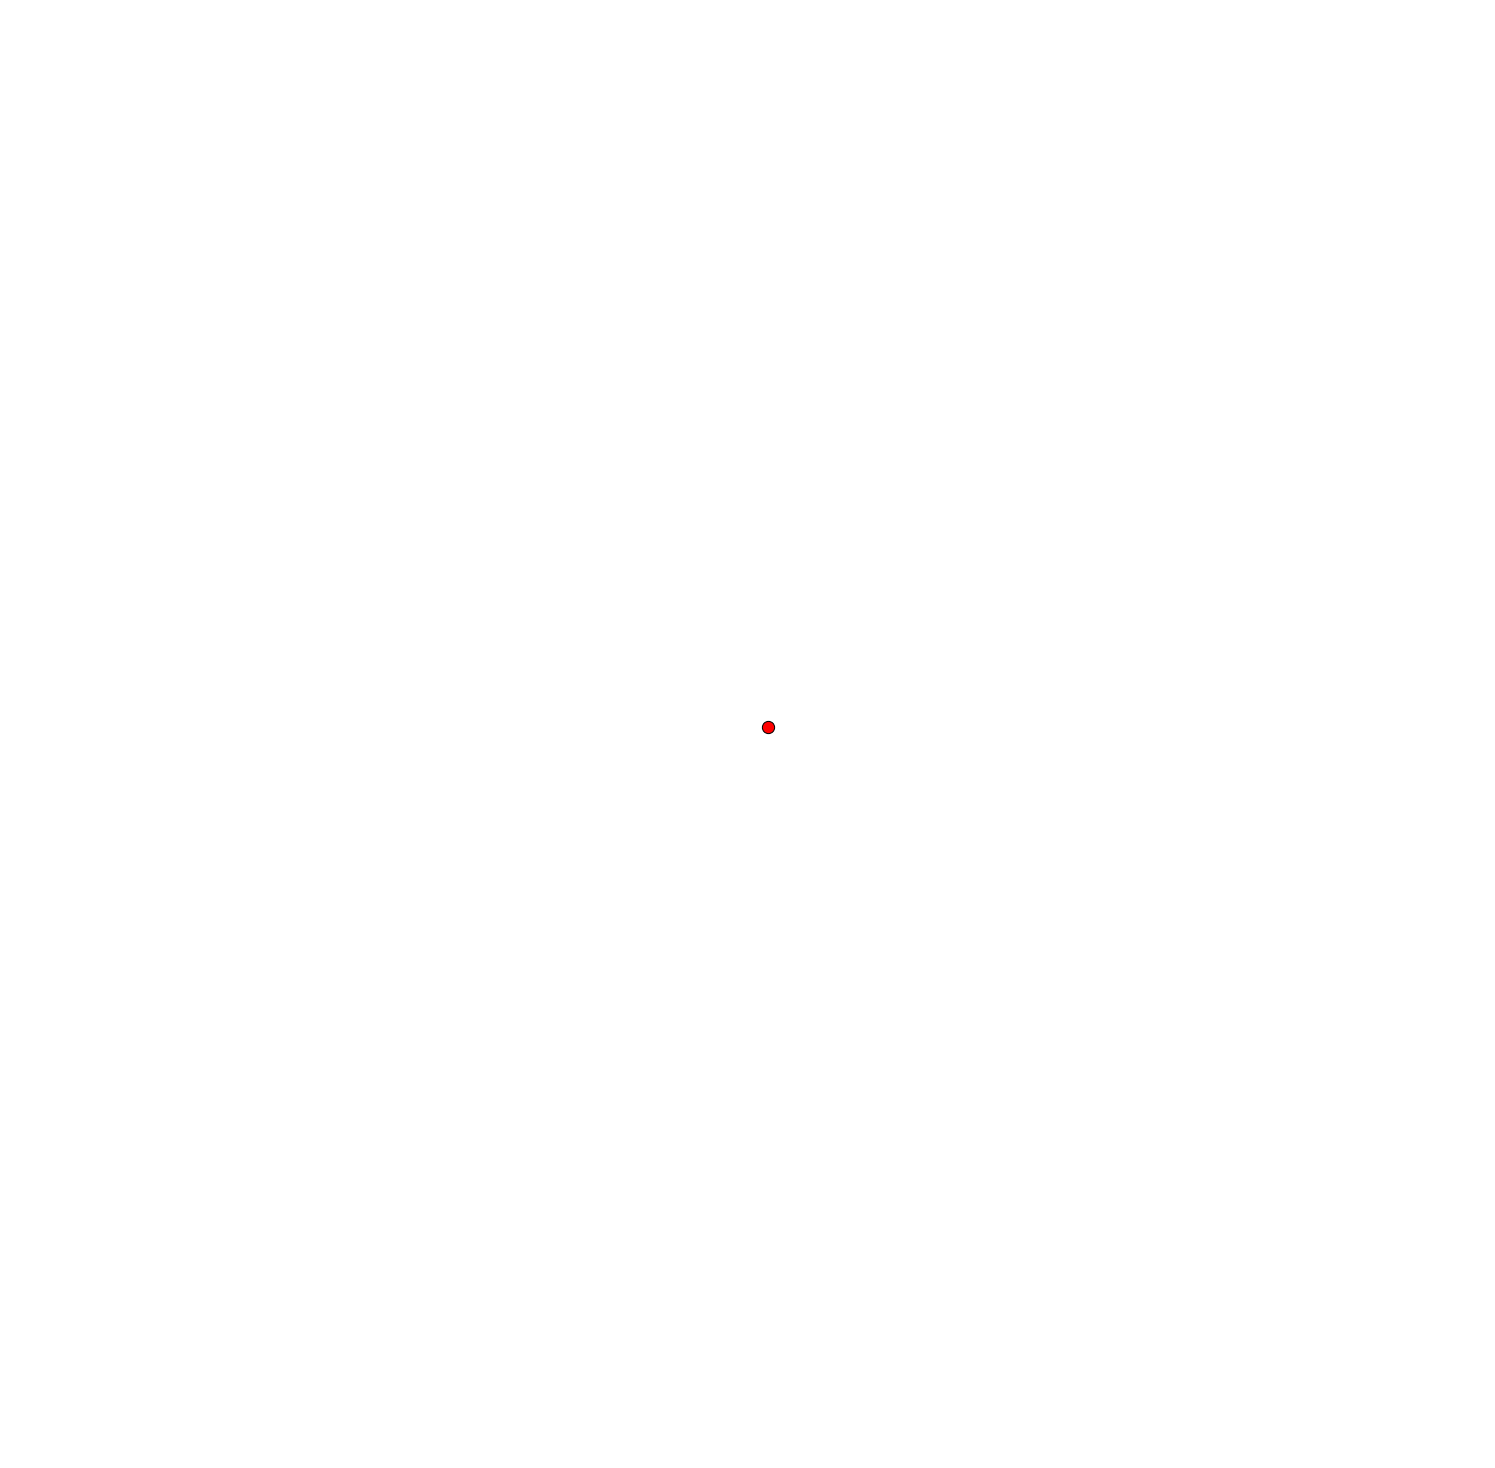

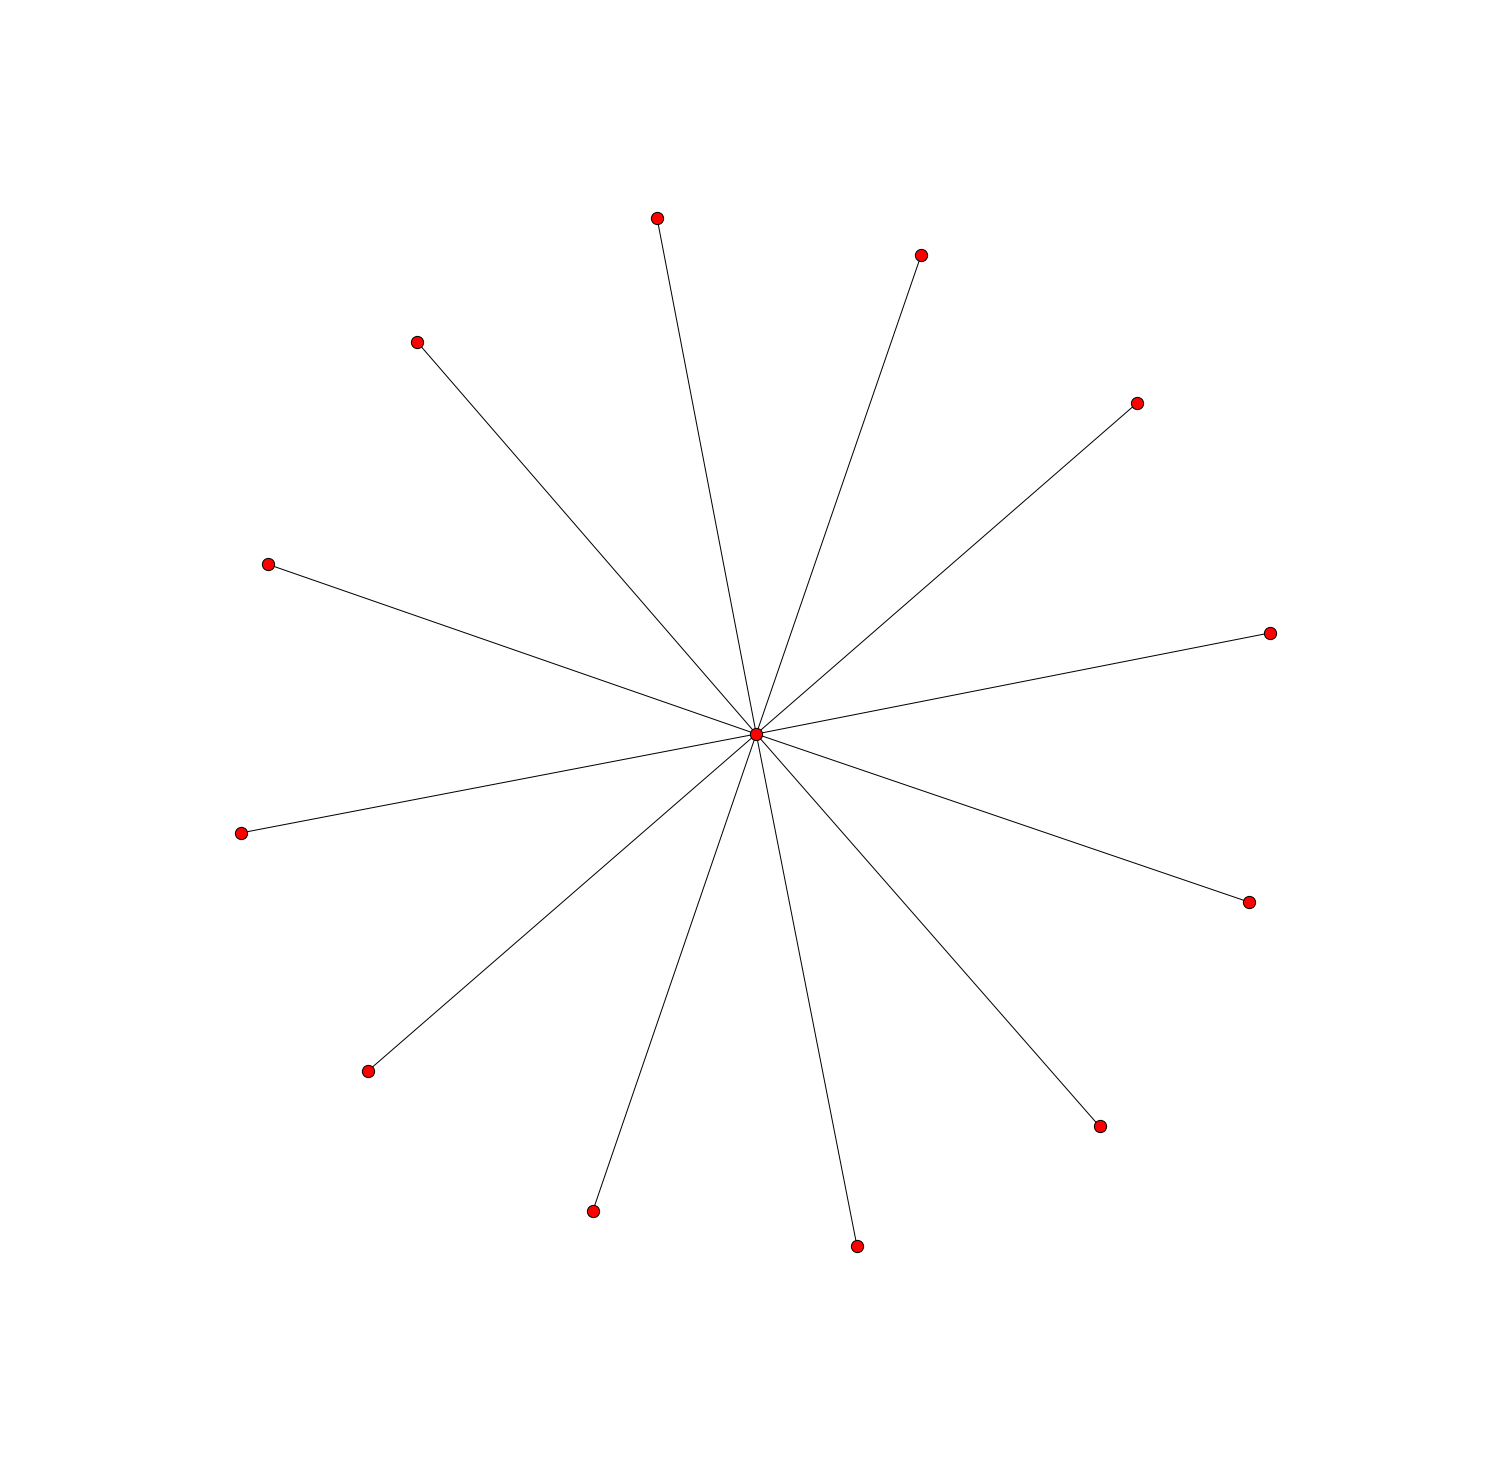

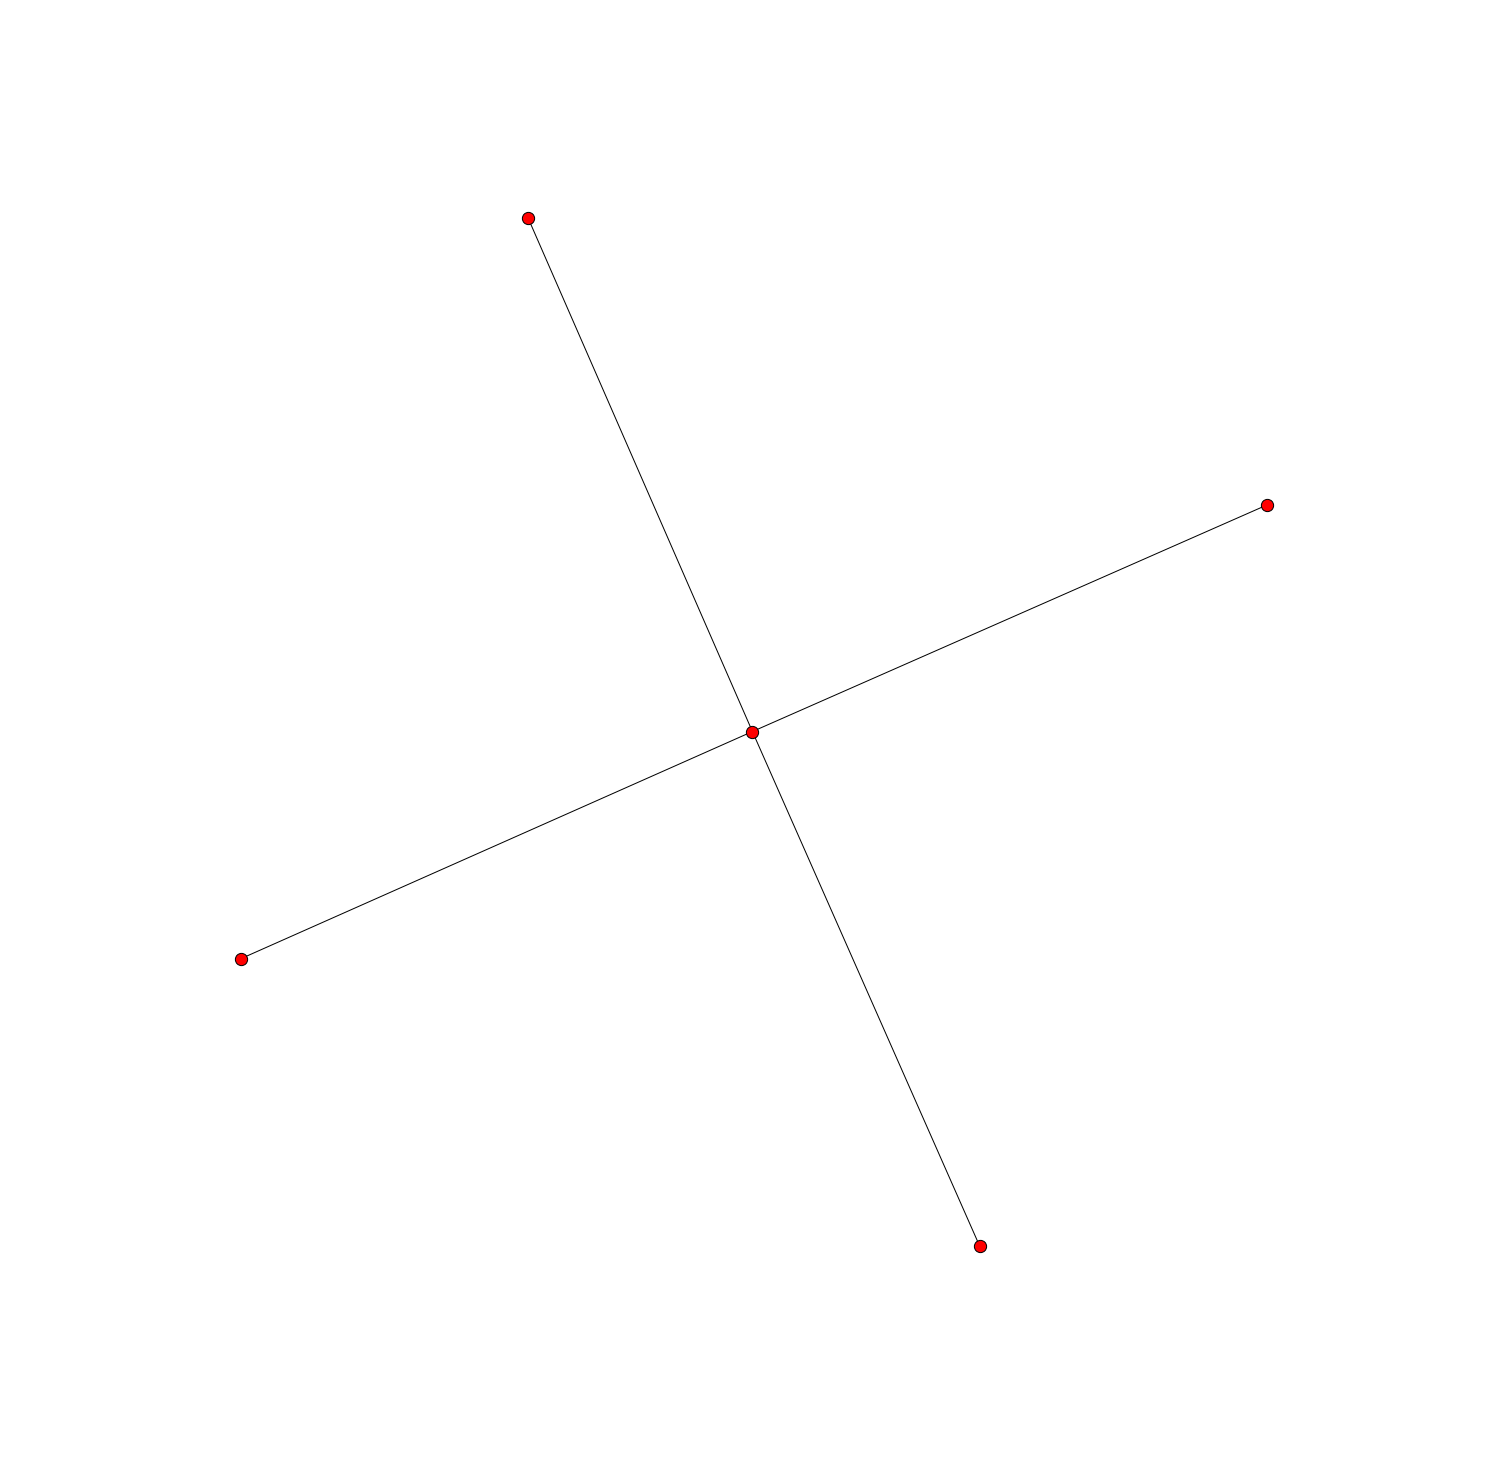

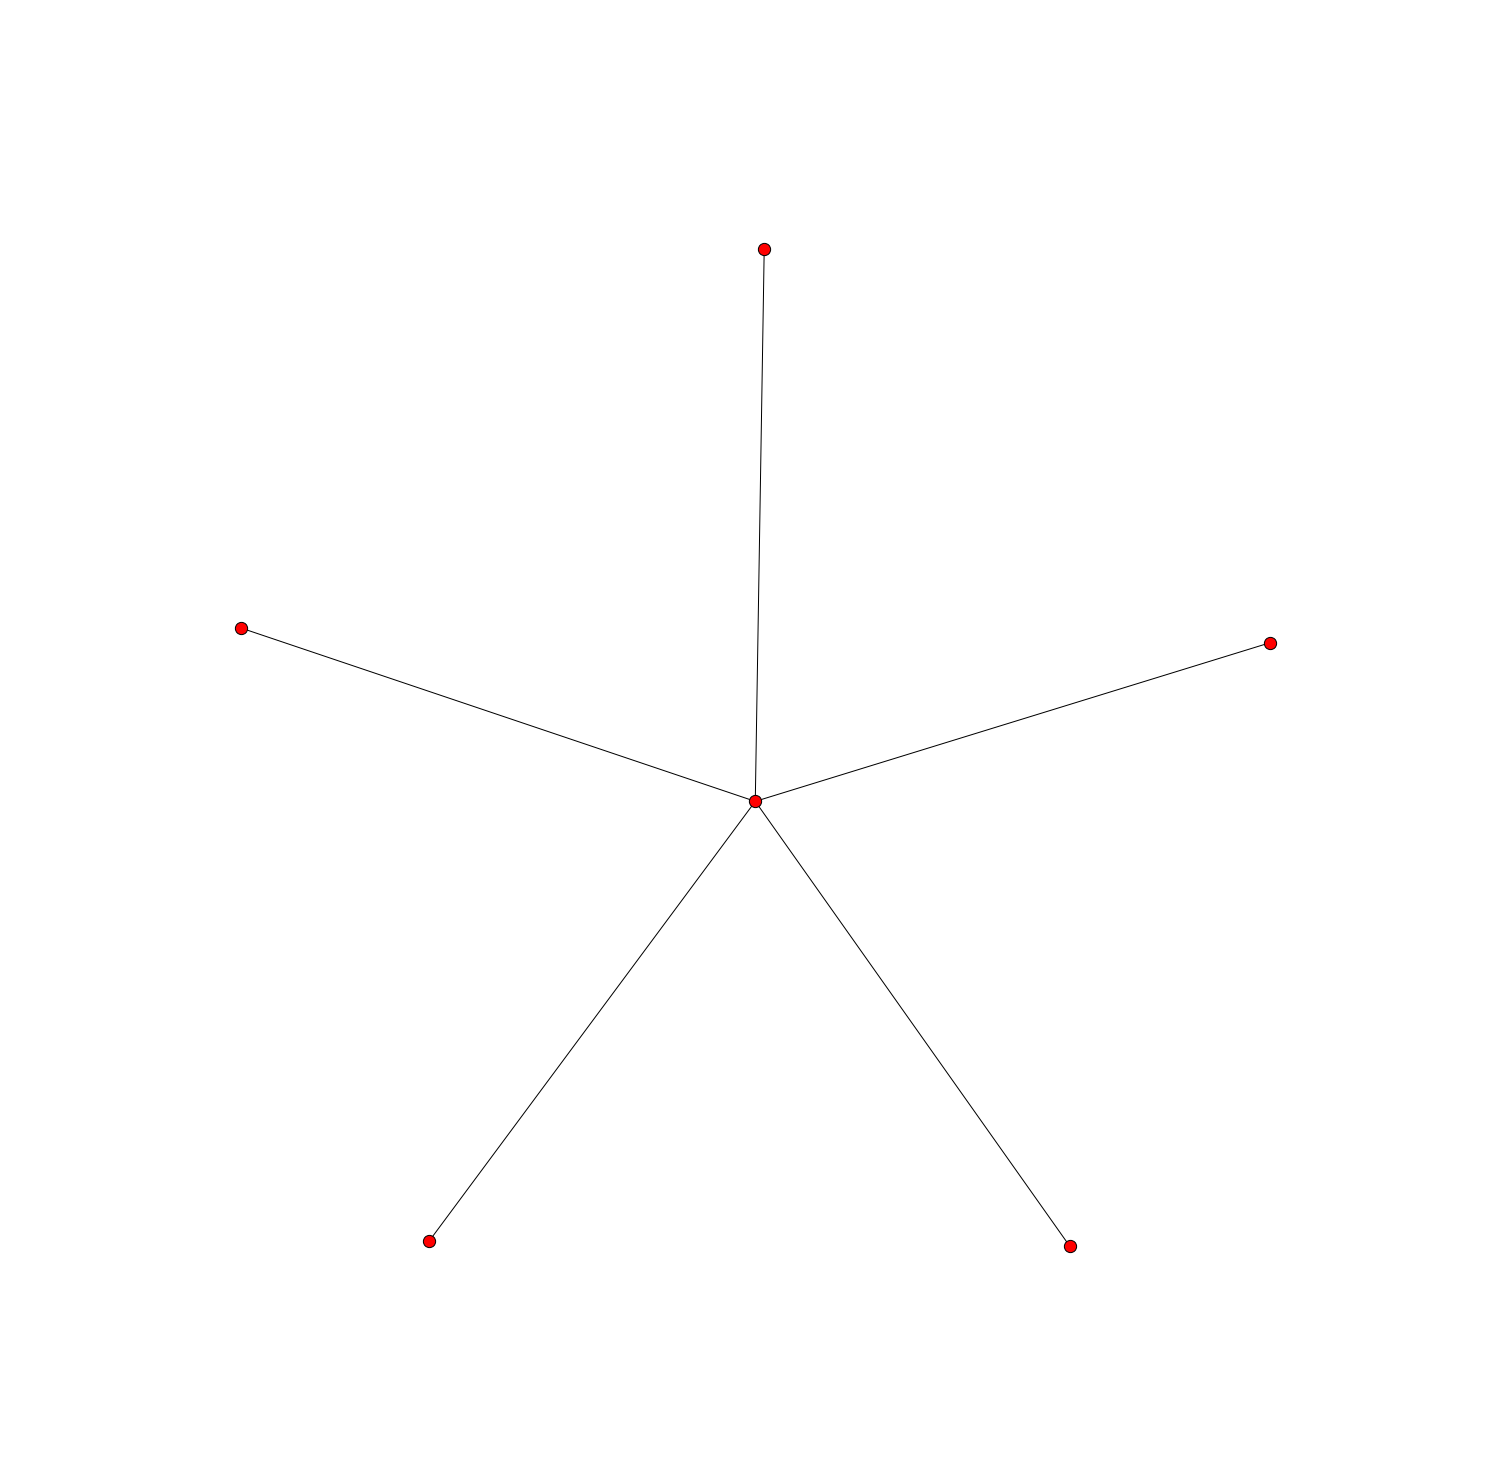

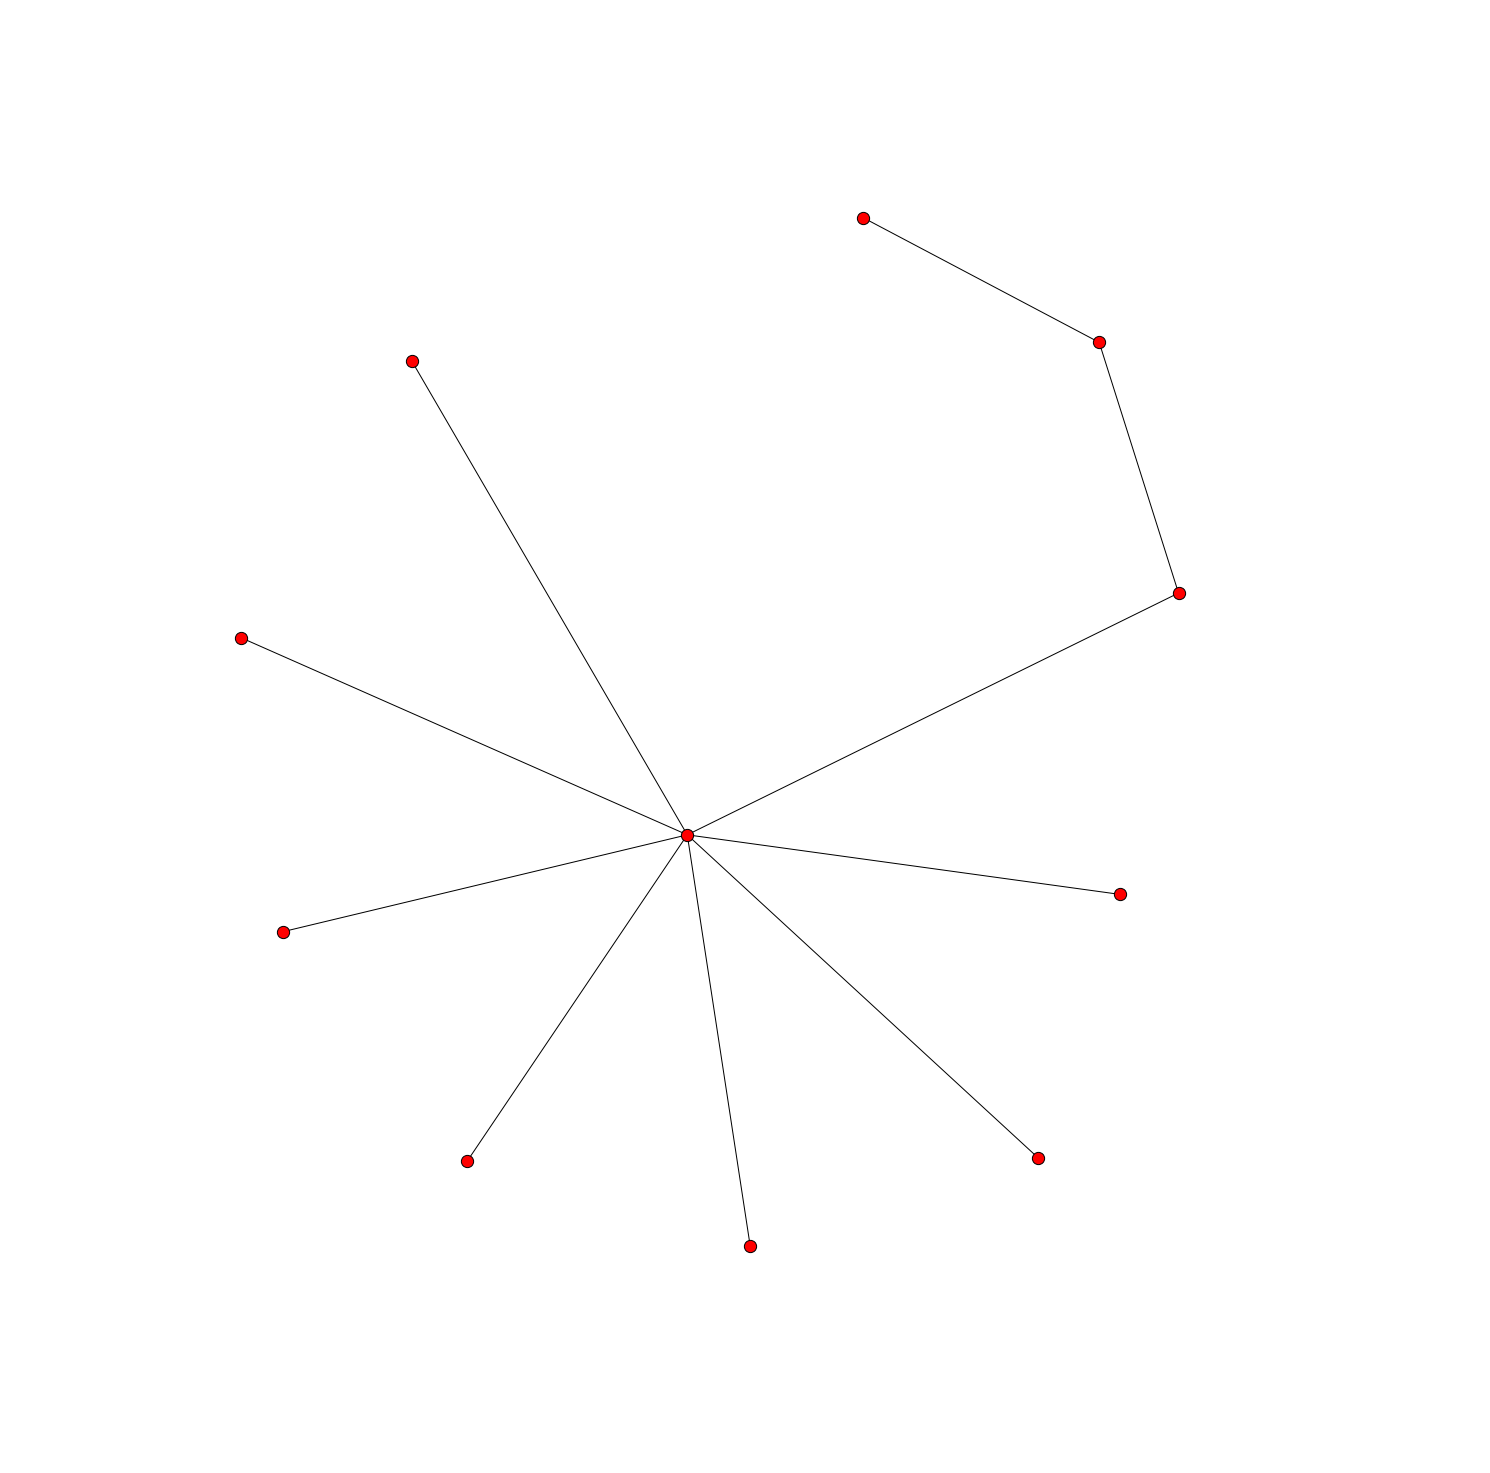

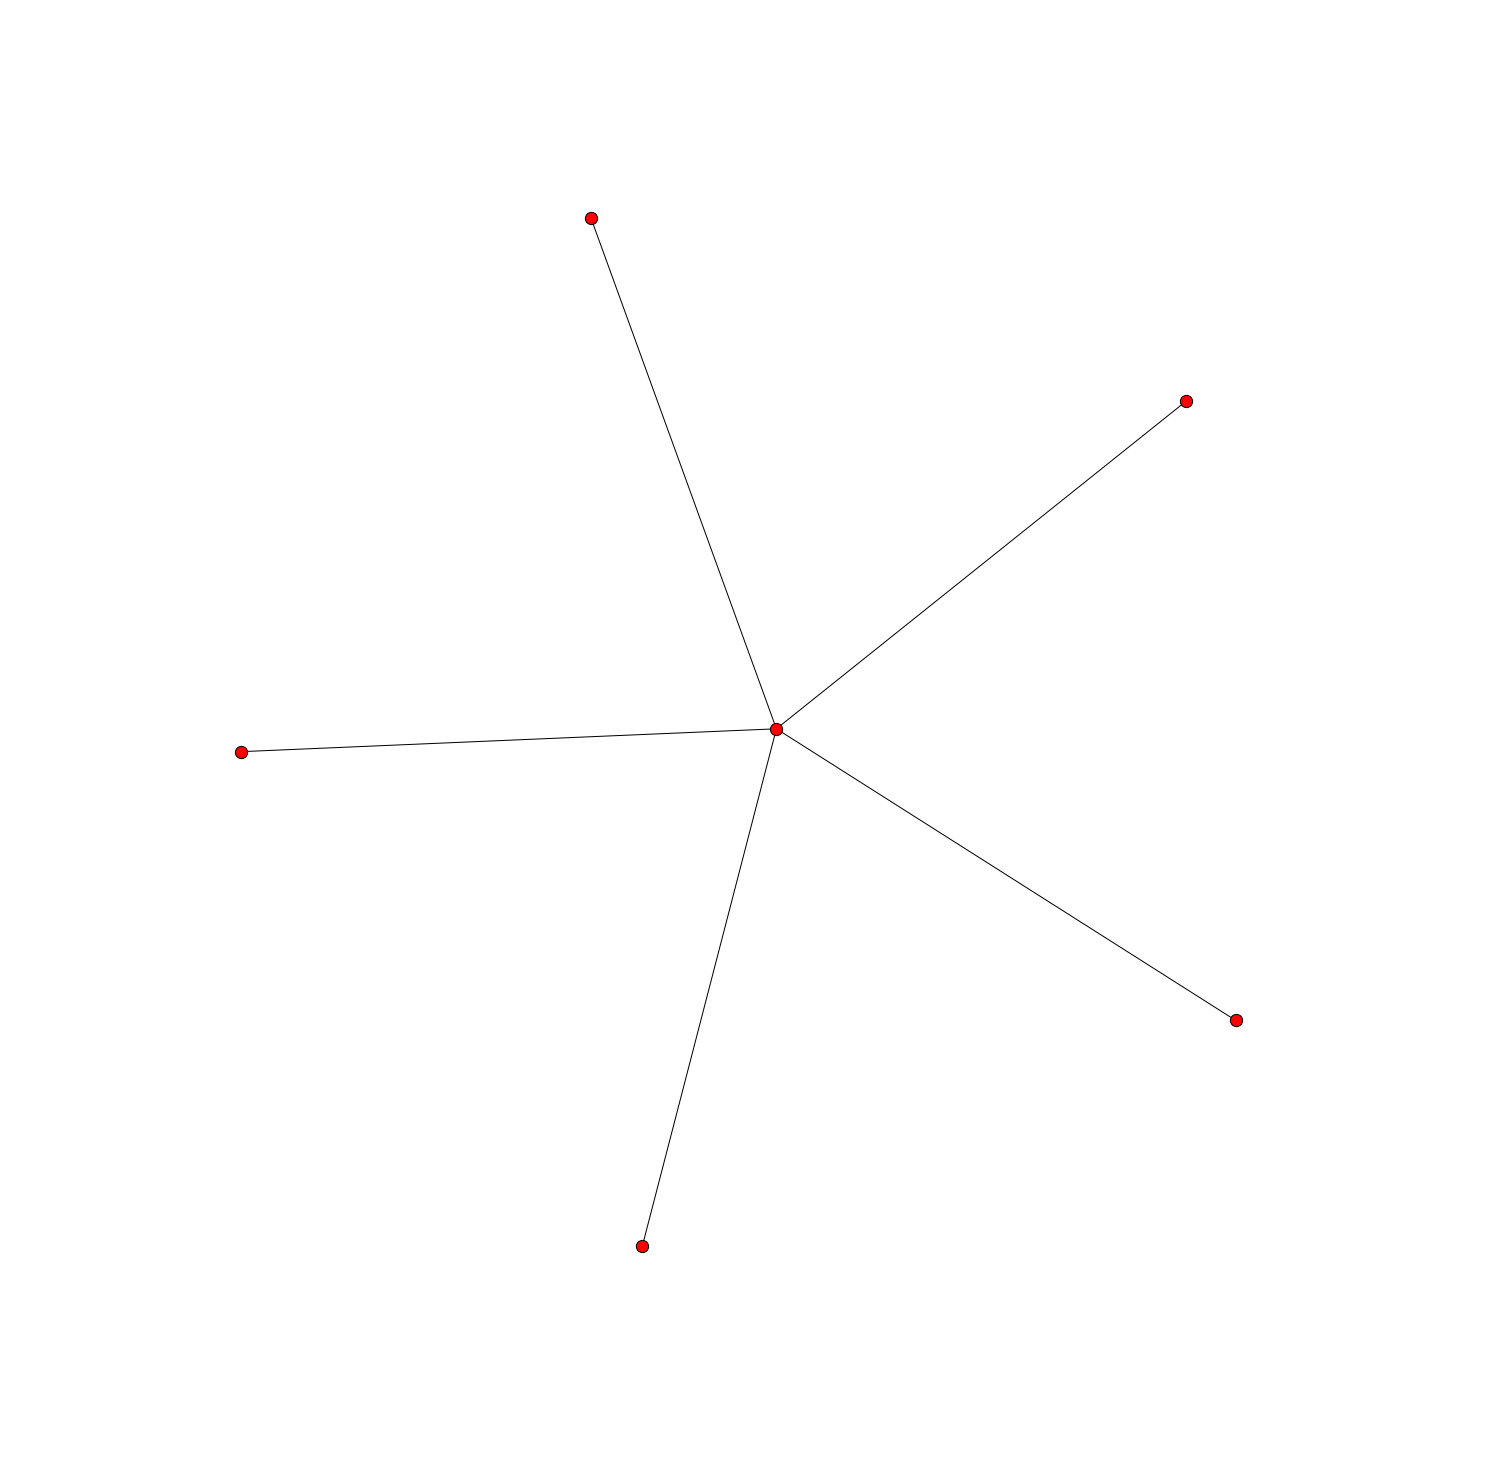

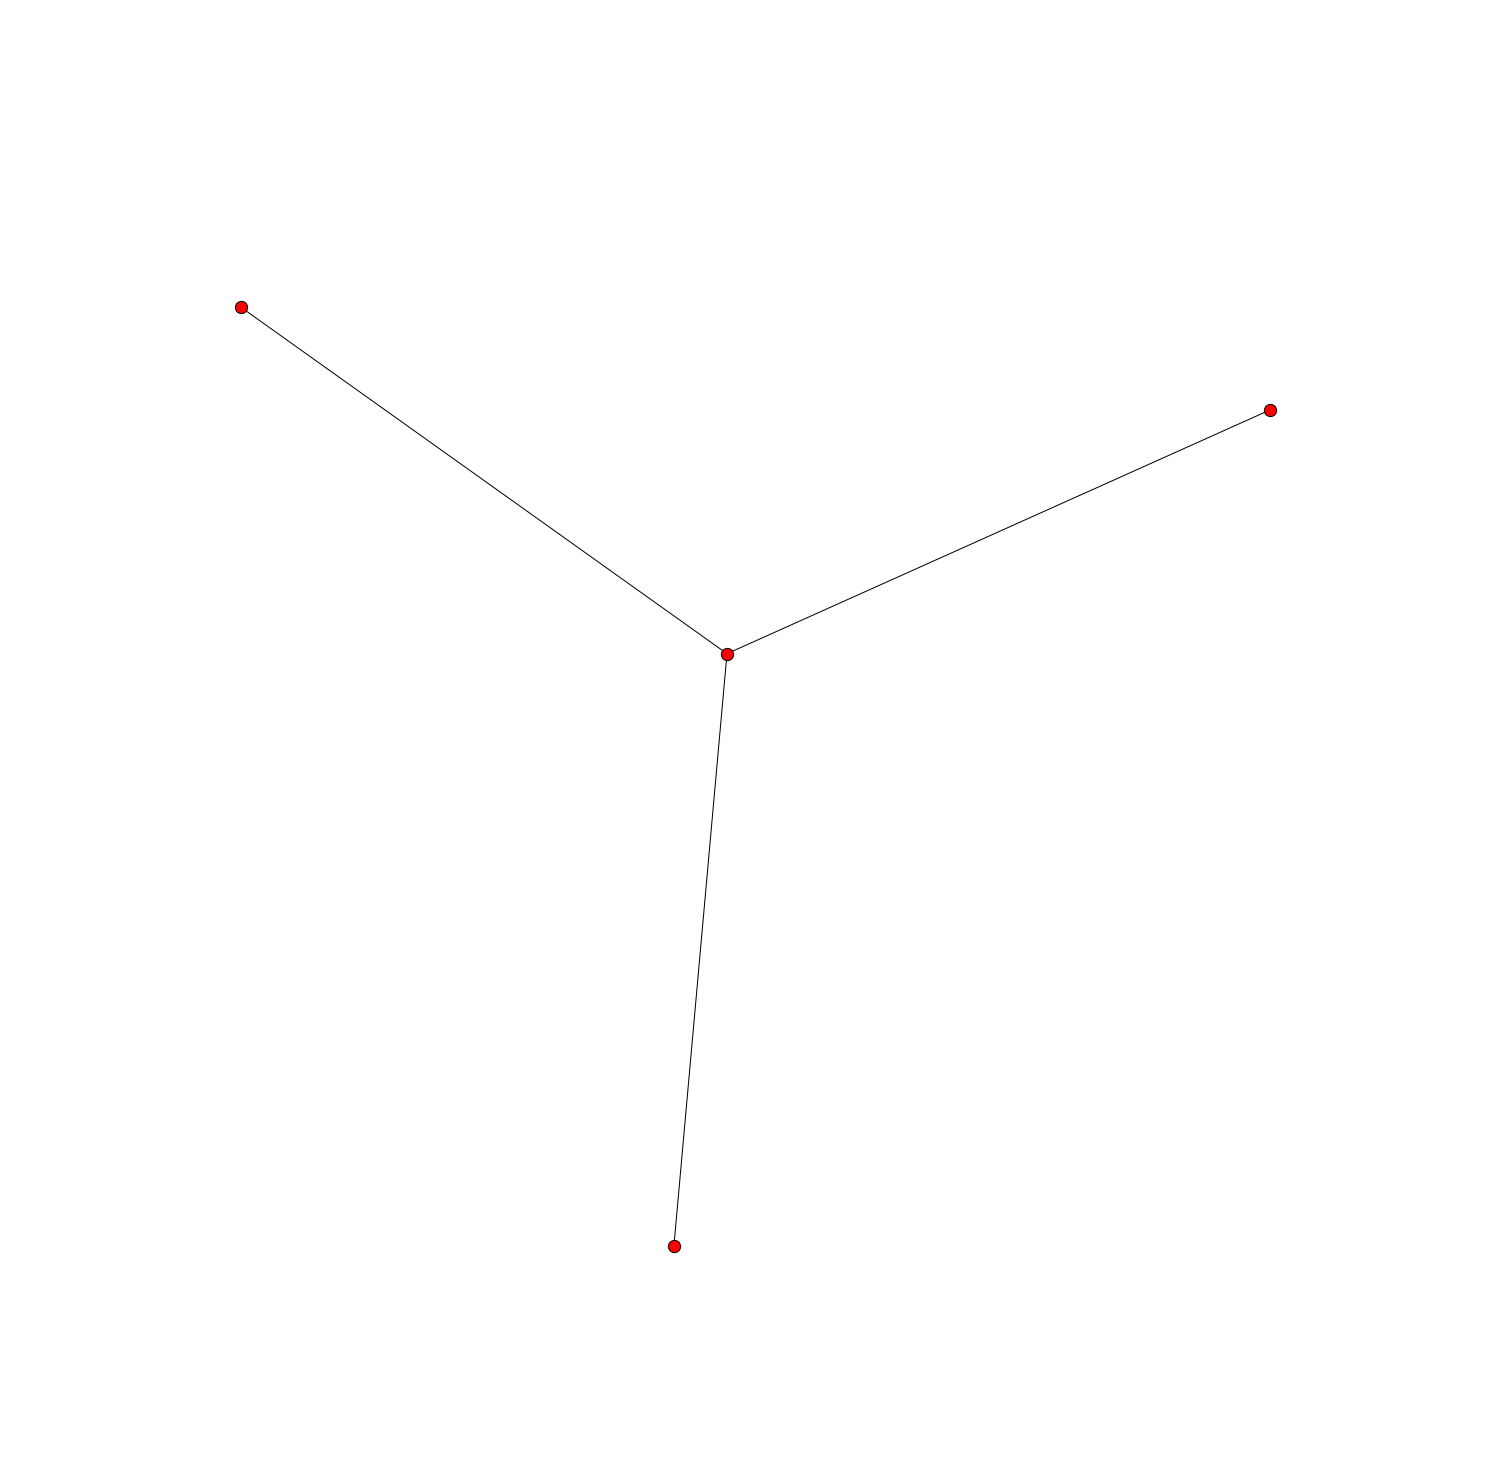

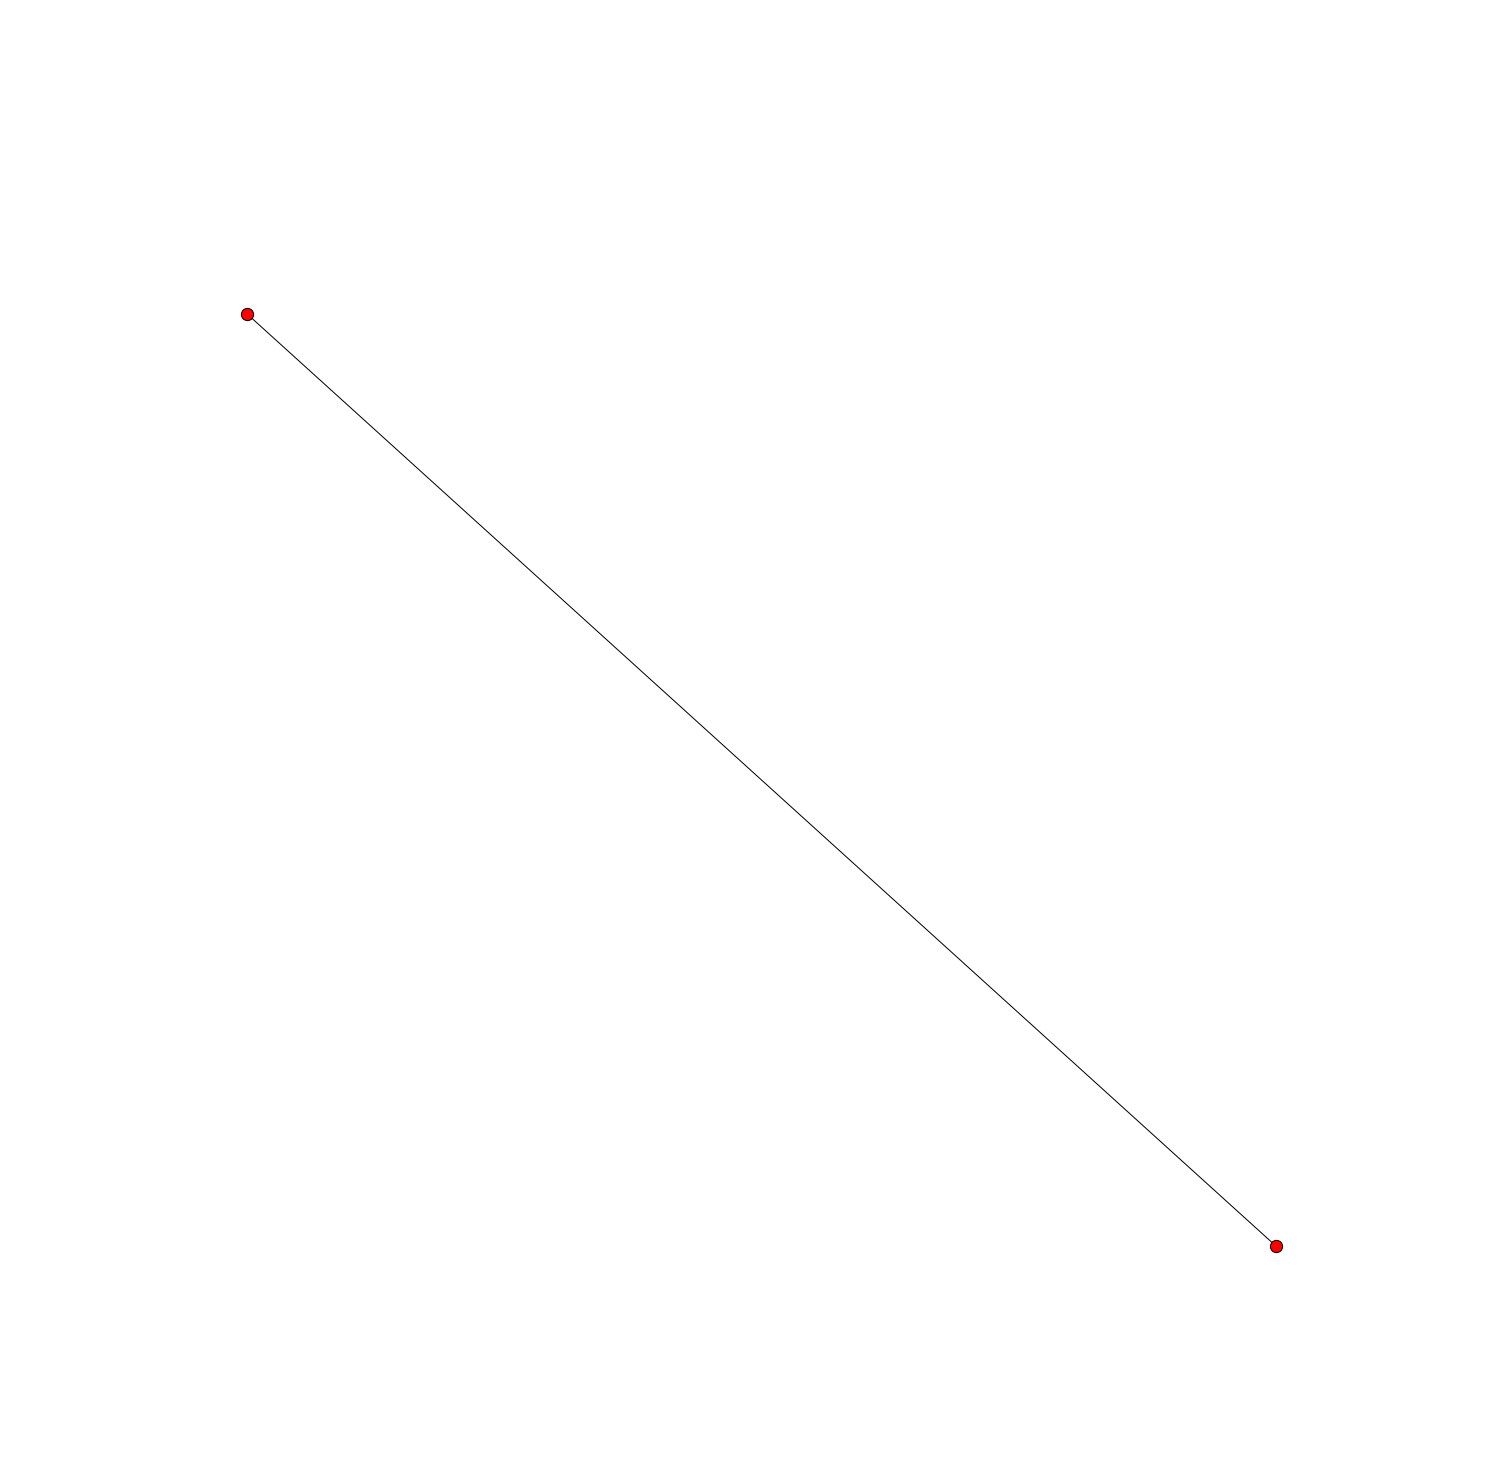

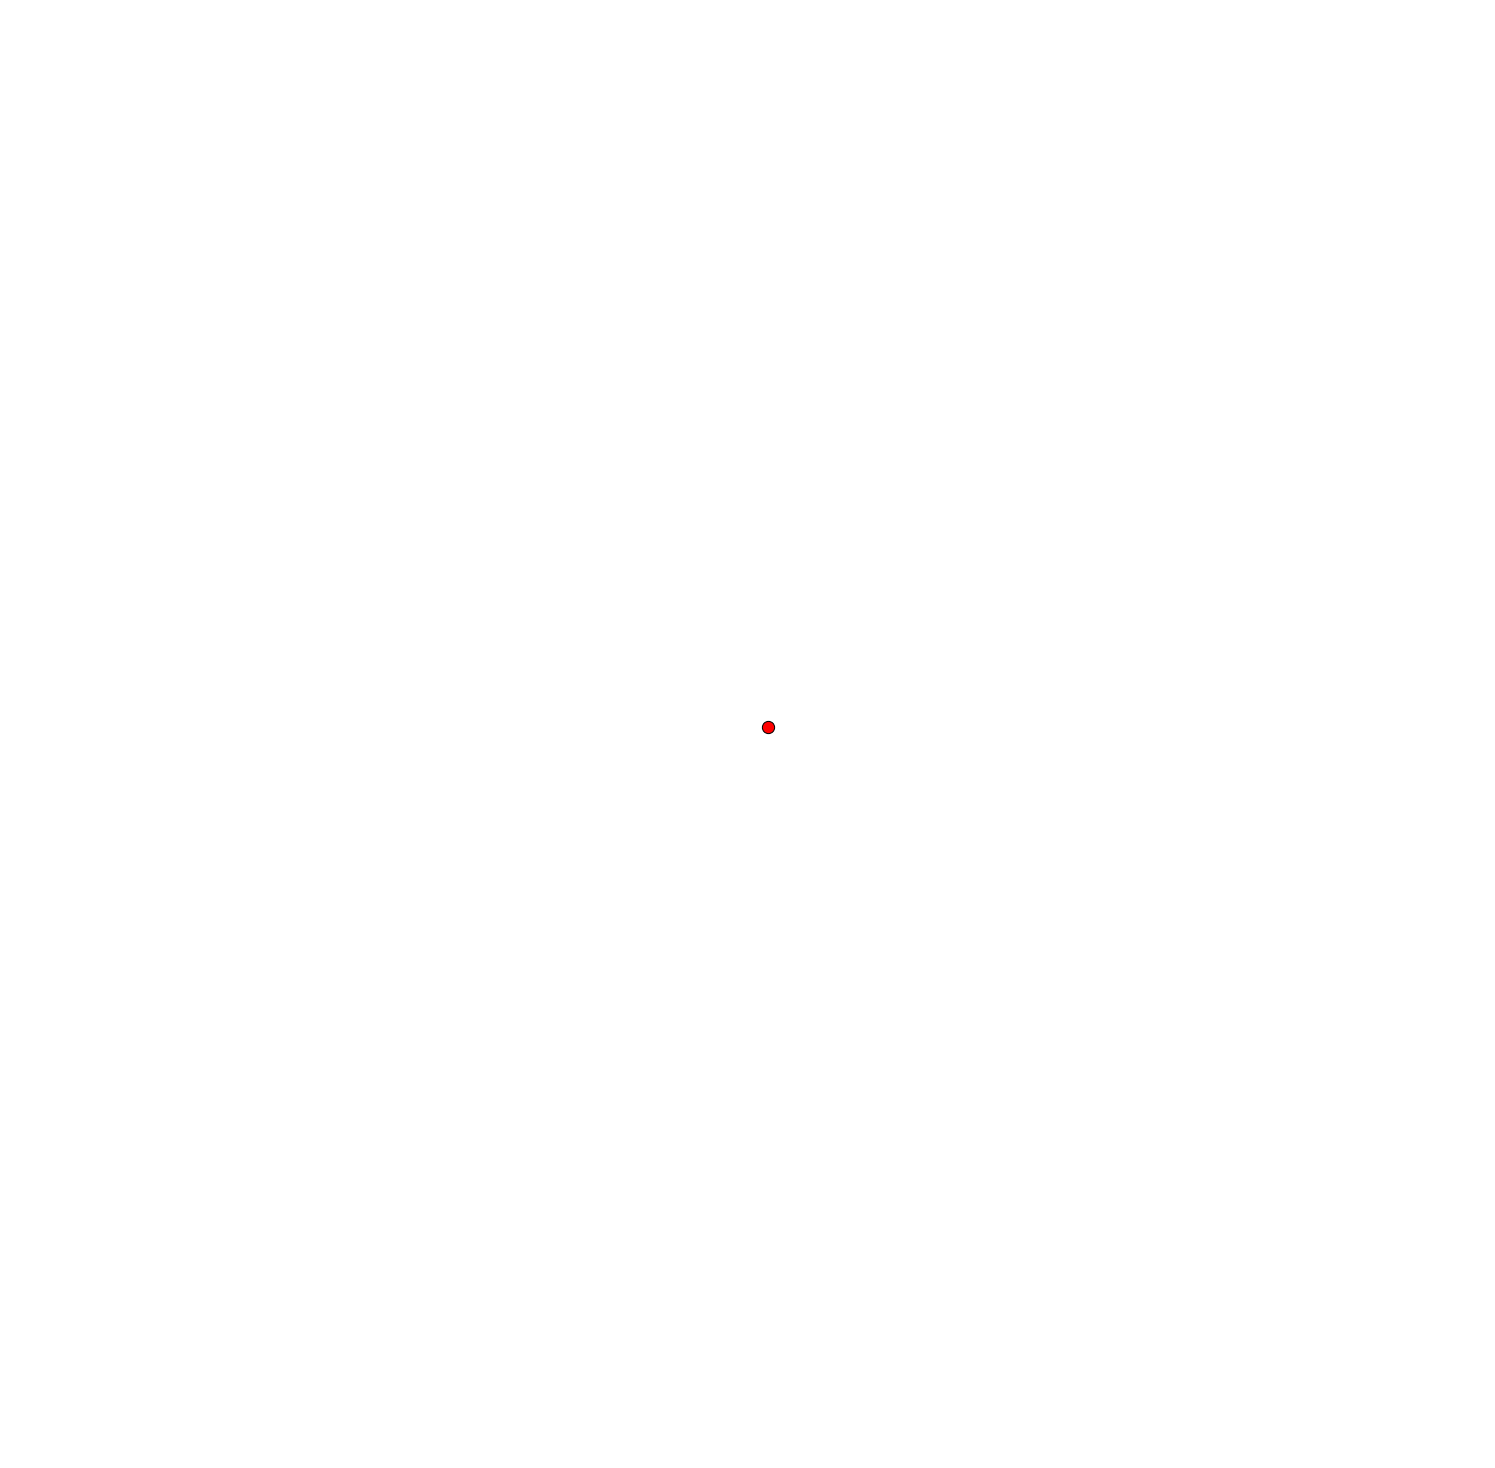

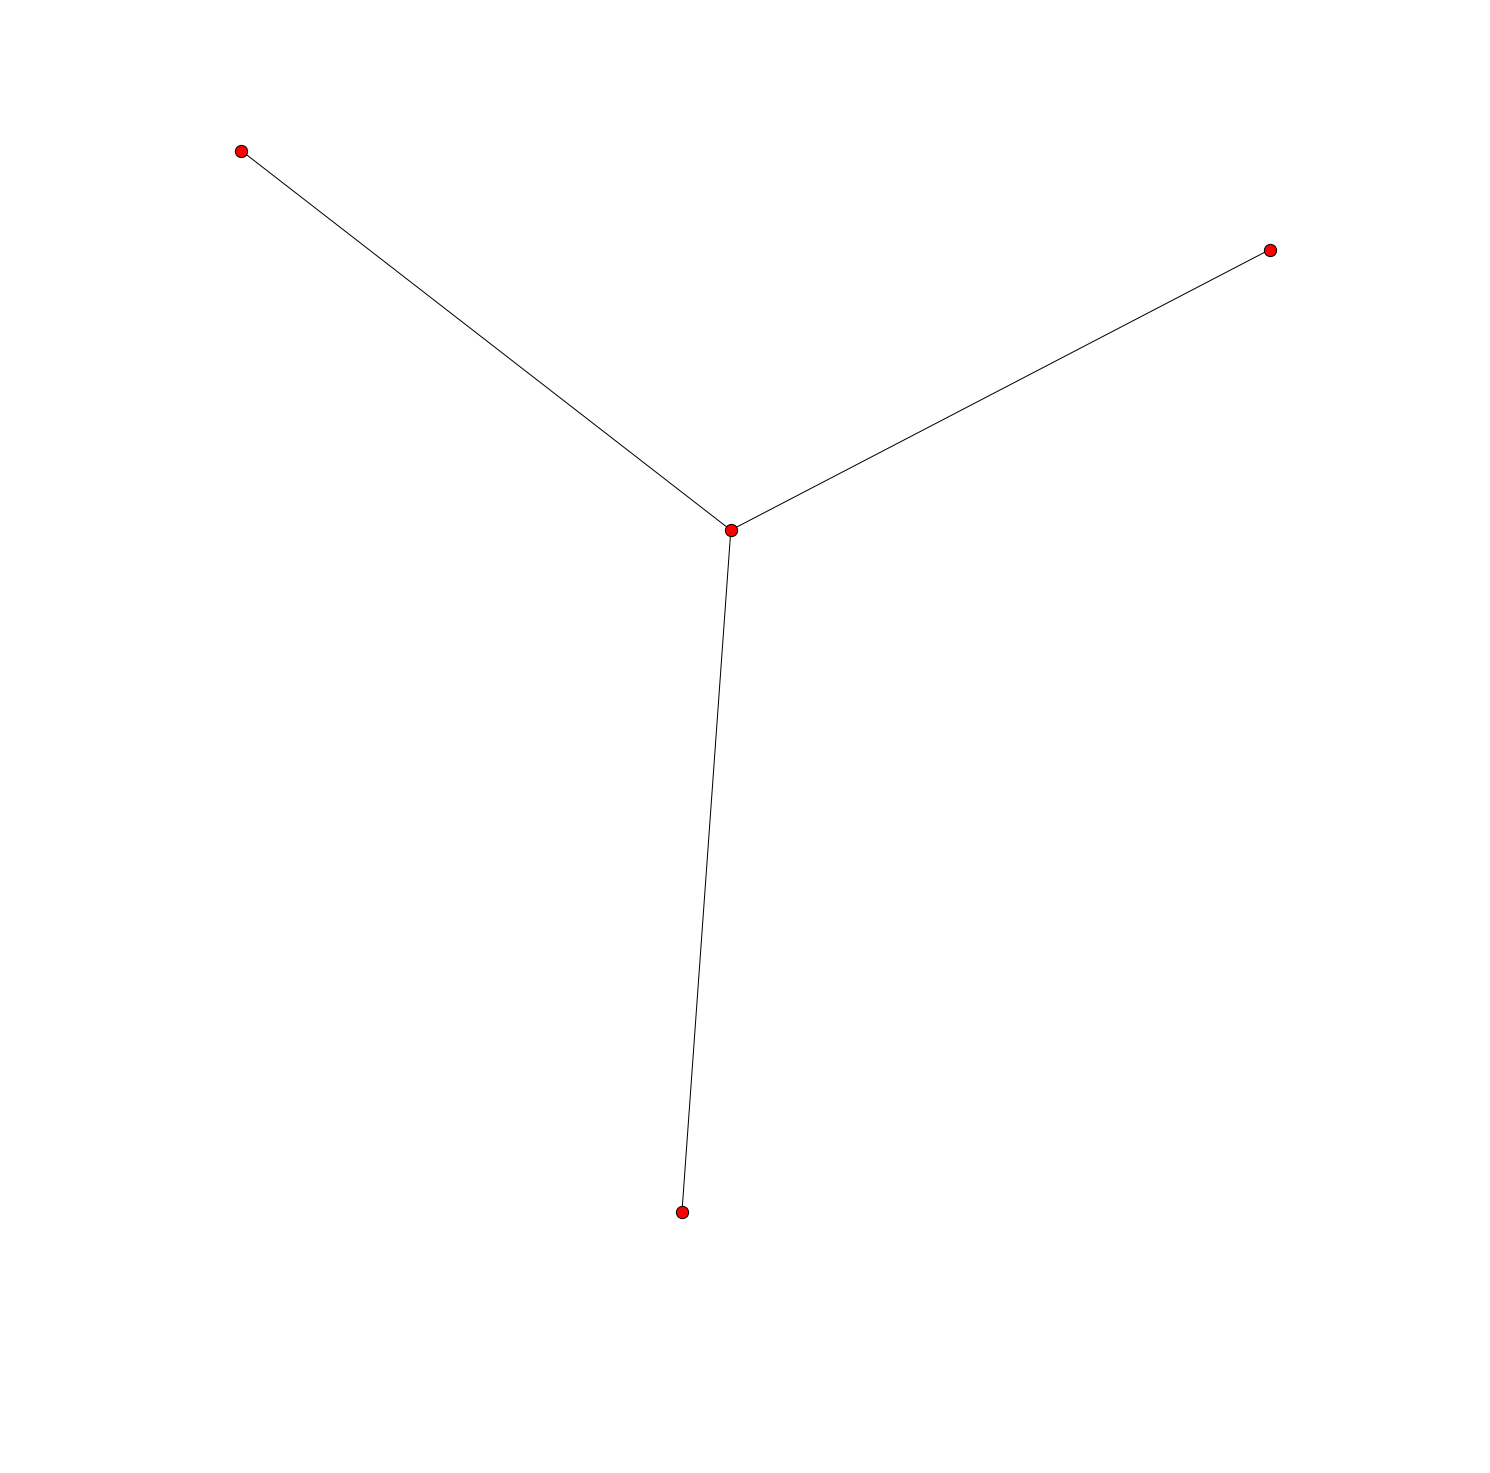

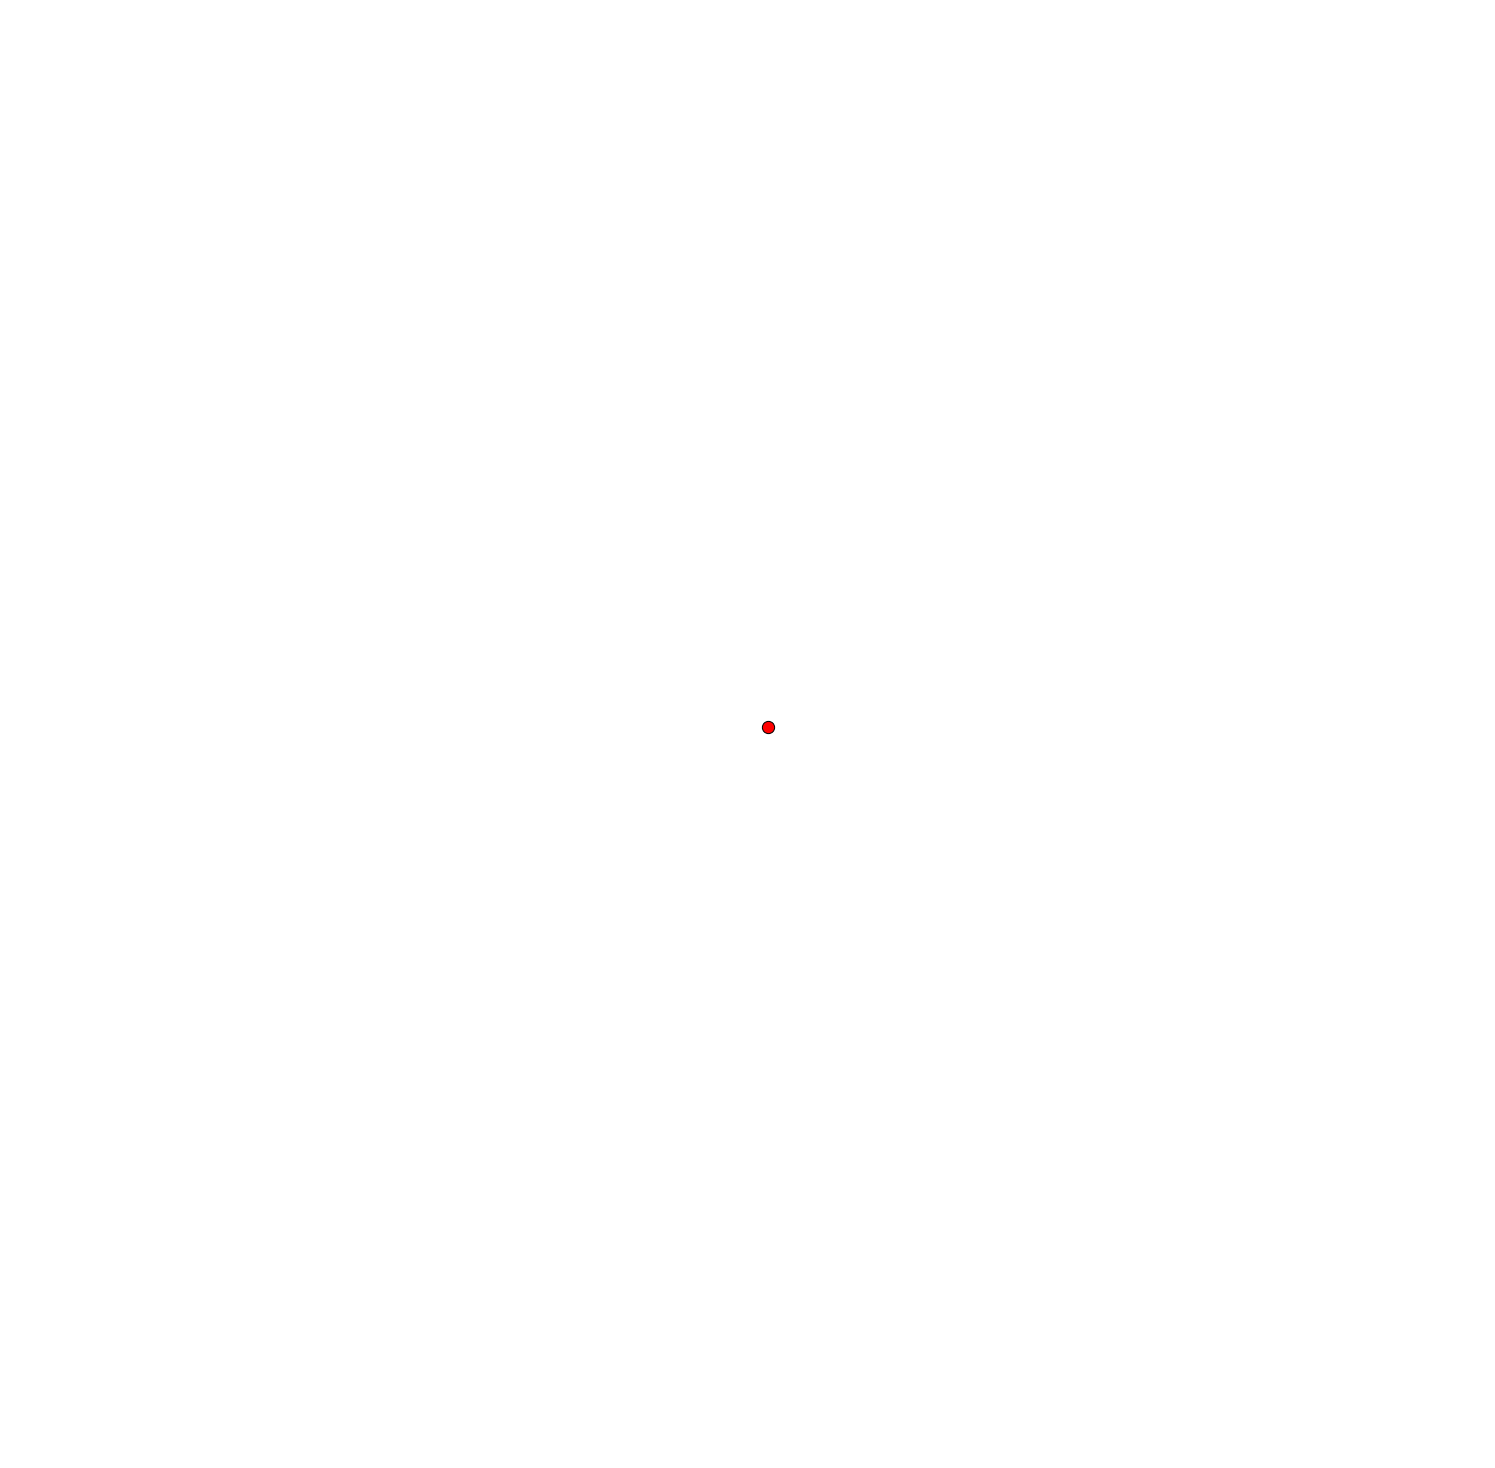

In [46]:
def setear_esquema_sin_etiquetas(grafo, ancho, alto, tamano_nodo, tamano_fuente):
    plt.figure(3, figsize=(ancho, alto)) 
    pos=nx.spring_layout(grafo)
    nx.draw(grafo, pos, node_size=tamano_nodo, font_size=tamano_fuente)

#G.remove_edge("0.0.0.0", "10.2.2.9")

graphs = list(nx.connected_component_subgraphs(G))

for graph in graphs:
    setear_esquema_sin_etiquetas(graph, 20, 20, 150, 8)
    pylab.show()


¿Cómo es el tráfico ARP en la red? 
....
¿Se pueden distinguir nodos? 
Hay dos nodos que 
¿Cuántos? 
¿Indica algo la cantidad? 
¿Se les puede adjudicar alguna función específica? 
¿Hay evidencia parcial que sugiera que algún nodo funciona de forma anómala y/o no esperada?


## Analisis de simbolos distinguidos utilizando who-has packages

In [27]:
def simbolo_s2(package):
    return package.pdst

## Analisis de simbolos distinguidos utilizando is_at packages

In [42]:
def simbolo_s3(package):
    return package.psrc

In [30]:
fuente_s3 = pd.Series([simbolo_s3(p) for p in is_at_packages])
contadores_s3 = fuente_s3.value_counts()
print contadores_s3
print "Entropia de la fuente =", entropia_fuente(fuente_s3)
print informacion_simbolos(fuente_s3)

10.254.213.74     43
10.254.213.103     1
dtype: int64
Entropia de la fuente = 0.156491062906
10.254.213.74     0.033167
10.254.213.103    5.459432
dtype: float64


len(is_at_packages)

## Red wi-fi de los labos

In [100]:
packages = sc.sniff(offline="labos-facu-tarde-(30mins).pcap")

In [101]:
arp_packages = map(lambda p: p["ARP"], arp_packages)
who_has_packages = filter(lambda p : p.op == ARP_OP_WHO_HAS,arp_packages)
is_at_packages = filter(lambda p : p.op == ARP_OP_IS_AT, arp_packages)

In [102]:
fuente_s2 = pd.Series([p.pdst for p in who_has_packages])
contadores = fuente_s2.value_counts()
entropia_s2 = entropia_fuente(fuente_s2)
print contadores
print "Entropia de la fuente =", entropia_s2
print "Informacion simbolos"
print informacion_simbolos(fuente_s2).iloc[:]

10.2.7.254         1059
10.2.203.254        706
10.2.1.250          231
10.2.3.254          155
10.2.2.254          102
169.254.255.255      97
10.2.0.67            85
10.2.0.65            84
10.2.0.64            84
10.2.0.187           60
10.2.7.249           49
10.2.7.250           46
10.2.203.182         22
10.210.210.199       21
10.2.2.250           20
10.2.0.190           20
10.2.201.82          19
10.2.1.4             17
10.2.203.155         16
10.2.200.230         13
10.2.3.249           13
10.2.201.192         13
10.2.202.191         12
10.2.202.31          12
10.2.0.254           11
10.2.2.9             11
10.2.203.72          10
10.2.200.6           10
10.2.6.15            10
10.2.5.1             10
                   ... 
10.2.201.73           1
10.2.0.185            1
10.2.201.117          1
10.2.5.12             1
10.2.200.207          1
10.2.0.251            1
10.2.200.144          1
10.2.203.135          1
10.2.202.61           1
10.2.4.11             1
10.2.202.205    

In [128]:
# needs mayavi2
# run with ipython -wthread
import networkx as nx
import numpy as np
from enthought.mayavi import mlab

# some graphs to try
#H=nx.krackhardt_kite_graph()
#H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
#H=nx.grid_2d_graph(4,5)
H=nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G=nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos=nx.spring_layout(G,dim=3)
# numpy array of x,y,z positions in sorted node order
xyz=np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars=np.array(G.nodes())+5

mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                    scalars,
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues',
                    resolution=20)

pts.mlab_source.dataset.lines = np.array(G.edges())
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

mlab.savefig('mayavi2_spring.png')
# mlab.show() # interactive window

ImportError: No module named enthought.mayavi

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



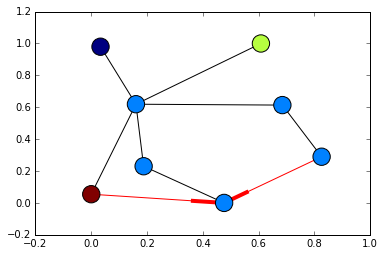

In [61]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = values)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

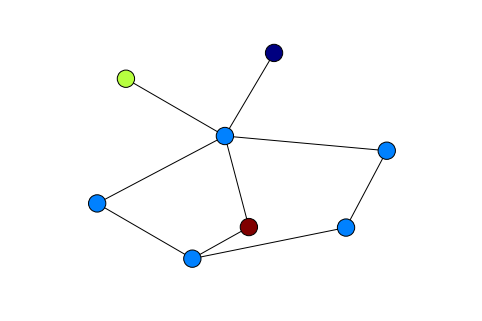

In [62]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

In [30]:
 from matplotlib import pylab
 import networkx as nx

 def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(80, 80), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(A,"my_graph.pdf")

#it can also be saved in .svg, .png. or .ps formats